### Tutorial 5 (Date 18 Sep, 2019)

Today's Attendance: https://forms.gle/uSf8JqubE4nDT65d9

Today's Notebook link: https://bit.ly/2lUP3EK

Topics
- Semantic Role Labelling
- PropBank, FrameNet
- PredPatt
- Semantic Parsers
- Other tasks - WSD, Coreference resolution

A lot of theory content and most of the SRL examples in this notebook are taken from Chapter 18 of Jurafsky and Martin's book - https://web.stanford.edu/~jurafsky/slp3/18.pdf




# 1. Semantic Role Labelling

To answer **"who did what to whom"**, one needs to have a meaningful understanding of an utterance, and this has been of interest in natural language understading for quite a long time.









## 1.1 Semantic Roles

Let's take an example.

  "The boy broke a glass."
  
  Let's draw the dependency tree for the above sentence.

In [0]:
import spacy
nlp = spacy.load('en')
from spacy import displacy
doc1 = nlp(u"The boy broke a glass.")
displacy.render(doc1, style="dep", jupyter=True, options={'compact':False})


 - Semantic roles are abstract roles of arguments that are played in some event which is denoted by the predicate. 

For example, in the above case, the event being talked about is "break" which has two arguments. The first argument is the boy who broke something which can be though of as the 'AGENT' of the event. The object "glass" can be called as a THEME. Tags like 'AGENT' and 'THEME' are called semantic roles. 

 - These roles are defined in databses like PropBank and FrameNet. 

#### Some Thematic Roles

Agents can be considered as a thematic role. We can think if it as representing "volitional causation". The object of verbs like break are prototypically inanimate objects, which are affected by the event of breaking. 

- Agent: the volitional causer of an event

- Theme: The participant most directly affected by an event

- Experiencer: The experiencer of an event 

- Instrument: An instrument used in an event


#### "There's no universally agreed upon set of roles." 

#### Why are these roles important? Can't we just use the syntactic parsers?

These roles help us build a shallow semantic representation which cannot be expressed by syntactic parses.

For eg: You might say the subject of the predicate is always the agent. But consider sentence 2.

    1. Jon broke the window.
    
    Jon -- agent, the window -- theme
    
    2. The window was broken by John. 
    
    The window -- theme, John -- agent.
    
    3. Jon broke the window with a hammer.
    
    hammer -- the instrument
    
    4. The hammer broke the window.
    
    hammer -- instrument, window -- theme

## 1.2 PropBank

Roles are defined for each definition of a verb in PropBank.

Frames from PropBank: https://github.com/propbank/propbank-frames/blob/master/framesThe 

#### Semantic Role Labelling is the task of assigning semantic roles to a given input sentence.

#### Semantic Role Labelling generally has four sub-tasks:
1. predicate identificatoin
2. predicate disambiguation
3. argument identification
4. argument classification

#### Let's use the Allenlp library to check the probably State-of-the-Art SRL

In [34]:
!pip install allennlp

#### Download the SRL model from allennlp

In [0]:
from allennlp.predictors.predictor import Predictor
predictor = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/bert-base-srl-2019.06.17.tar.gz")


In [36]:
predictor.predict(sentence="The boy broke the window with a hammer.")

{'verbs': [{'description': '[ARG0: The boy] [V: broke] [ARG1: the window] [ARG2: with a hammer] .',
   'tags': ['B-ARG0',
    'I-ARG0',
    'B-V',
    'B-ARG1',
    'I-ARG1',
    'B-ARG2',
    'I-ARG2',
    'I-ARG2',
    'O'],
   'verb': 'broke'}],
 'words': ['The', 'boy', 'broke', 'the', 'window', 'with', 'a', 'hammer', '.']}

In [37]:
predictor.predict(sentence="The window was broken by the boy.")

{'verbs': [{'description': 'The window [V: was] broken by the boy .',
   'tags': ['O', 'O', 'B-V', 'O', 'O', 'O', 'O', 'O'],
   'verb': 'was'},
  {'description': '[ARG1: The window] was [V: broken] [ARG0: by the boy] .',
   'tags': ['B-ARG1', 'I-ARG1', 'O', 'B-V', 'B-ARG0', 'I-ARG0', 'I-ARG0', 'O'],
   'verb': 'broken'}],
 'words': ['The', 'window', 'was', 'broken', 'by', 'the', 'boy', '.']}

You can also check out their online demo at: https://demo.allennlp.org/semantic-role-labeling/


## 1.3 Quick note on FrameNet

Frame Net is another semantic role labelling Project which assigns Semantic roles. But it considers different verbs and nouns that could be in the same frame.

For eg, consider the following sentences:
  
  1. [The price of bananas] **increased** [5%.]
  
  2. [The price of bananas] **rose** [5%].
  
  3. There has been a [5%] **rise** in [the price of bananas.]

We want to infer that the price of bananas went up, and it went up by 5%. 

In [38]:
predictor.predict(sentence="The price of bananas increased 5%.")

{'verbs': [{'description': '[ARG1: The price of bananas] [V: increased] [ARG2: 5 %] .',
   'tags': ['B-ARG1',
    'I-ARG1',
    'I-ARG1',
    'I-ARG1',
    'B-V',
    'B-ARG2',
    'I-ARG2',
    'O'],
   'verb': 'increased'}],
 'words': ['The', 'price', 'of', 'bananas', 'increased', '5', '%', '.']}

In [39]:
predictor.predict(sentence="The price of bananas rose 5%.")

{'verbs': [{'description': '[ARG1: The price of bananas] [V: rose] [ARG2: 5 %] .',
   'tags': ['B-ARG1',
    'I-ARG1',
    'I-ARG1',
    'I-ARG1',
    'B-V',
    'B-ARG2',
    'I-ARG2',
    'O'],
   'verb': 'rose'}],
 'words': ['The', 'price', 'of', 'bananas', 'rose', '5', '%', '.']}

In [40]:
predictor.predict(sentence="There has been a rise in the price of bananas")

{'verbs': [{'description': 'There [V: has] been a rise in the price of bananas',
   'tags': ['O', 'B-V', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
   'verb': 'has'},
  {'description': 'There has [V: been] [ARG1: a rise in the price of bananas]',
   'tags': ['O',
    'O',
    'B-V',
    'B-ARG1',
    'I-ARG1',
    'I-ARG1',
    'I-ARG1',
    'I-ARG1',
    'I-ARG1',
    'I-ARG1'],
   'verb': 'been'}],
 'words': ['There',
  'has',
  'been',
  'a',
  'rise',
  'in',
  'the',
  'price',
  'of',
  'bananas']}

In FrameNet, roles are specific to a frame instead of individual words as in PropBank

A frame is a concept like "air-travel". It could have roles related to: "reservation, flight, travel, buy, price, cost, fare, rates, meal, plane" etc.

Distinction between core-roles non-core roles.

# 2. PredPatt

 - Predicate-argument extraction from Universal Dependencies. 
 
 - Part of the decomp project (http://decomp.io/). 
  
 - Creates a shallow semantic layer from the syntactic structure of Universal Dependencies
 
 Details: https://github.com/hltcoe/PredPatt

Papers: 
  - https://www.aclweb.org/anthology/W17-6944/
  - https://www.aclweb.org/anthology/D16-1177/

In [41]:
!pip install git+https://github.com/hltcoe/PredPatt.git

  Cloning https://github.com/hltcoe/PredPatt.git to /tmp/pip-req-build-p32i654_
  Running command git clone -q https://github.com/hltcoe/PredPatt.git /tmp/pip-req-build-p32i654_
  Created wheel for predpatt: filename=predpatt-1.0-cp36-none-any.whl size=32237 sha256=5879d6b53cde740ab35d64debe9d917c73f51fe1d5d0e6b382173b73f6f57a2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-5rx2grha/wheels/6f/be/31/69b8044f23ec9a2b3442d2a0863642df0a1018b77eb9b87332
Successfully built predpatt


In [0]:
conllu = """
1	You	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	2	nsubj	_	_
2	wonder	wonder	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	_	_
3	if	if	SCONJ	IN	_	6	mark	_	_
4	he	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	6	nsubj	_	_
5	was	be	AUX	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	6	aux	_	_
6	manipulating	manipulate	VERB	VBG	Tense=Pres|VerbForm=Part	2	advcl	_	_
7	the	the	DET	DT	Definite=Def|PronType=Art	8	det	_	_
8	market	market	NOUN	NN	Number=Sing	6	dobj	_	_
9	with	with	ADP	IN	_	12	case	_	_
10	his	he	PRON	PRP$	Gender=Masc|Number=Sing|Person=3|Poss=Yes|PronType=Prs	12	nmod:poss	_	_
11	bombing	bombing	NOUN	NN	Number=Sing	12	compound	_	_
12	targets	target	NOUN	NNS	Number=Plur	6	nmod	_	SpaceAfter=No
13	.	.	PUNCT	.	_	2	punct	_	_
"""

#### Create a PredPatt object and extract predicates

Details at: https://github.com/hltcoe/PredPatt/blob/master/tutorial.ipynb

In [0]:
from predpatt import load_conllu, PredPatt, PredPattOpts
options = PredPattOpts(resolve_relcl=True, borrow_arg_for_relcl=True, resolve_conj=False, cut=True)

#### Print Relation triples

In [45]:
conll_example = [ud_parse for sent_id, ud_parse in load_conllu(conllu)][0]

print(conll_example.pprint(K=3))

nsubj(You/0, wonder/1)        root(wonder/1, ROOT/-1)           mark(if/2, manipulating/5)
nsubj(he/3, manipulating/5)   aux(was/4, manipulating/5)        advcl(manipulating/5, wonder/1)
det(the/6, market/7)          dobj(market/7, manipulating/5)    case(with/8, targets/11)
nmod:poss(his/9, targets/11)  compound(bombing/10, targets/11)  nmod(targets/11, manipulating/5)
punct(./12, wonder/1)


#### Create Predicate object and print predicate and arguments

In [0]:
pred_object = PredPatt(conll_example, opts=options)

In [47]:
print(" ".join([token.text for token in pred_object.tokens]))
print(pred_object.pprint(color=True))

You wonder if he was manipulating the market with his bombing targets .
	?a wonder
		?a: You
	?a was manipulating ?b with ?c
		?a: he
		?b: the market
		?c: his bombing targets


In [48]:
## Predicate instances
pred_object.instances

[Predicate(wonder/1), Predicate(manipulating/5)]

In [0]:
## Tokens
print(pred_object.tokens)

[You/0, wonder/1, if/2, he/3, was/4, manipulating/5, the/6, market/7, with/8, his/9, bombing/10, targets/11, ./12]


# 3. Semantic Parsers

Wikipedia defines semantic parsing as the task of converting a natural language utterance to a logical form: a machine-understandable representation of its meaning.

## 3.1 TRIPS Parser

TRIPS Ontology and TRIPS Lexicon can be found at: http://www.cs.rochester.edu/research/trips/lexicon/browse-ont-lex.html

 - TRIPS has its own semantic roles which are defined differently than PropBank. 

 - These roles are better readable (unlike Arg0, Arg1 etc.).


 - The roles are not specific to individual verbs. 

Details about the parser: https://www.aaai.org/ocs/index.php/SSS/SSS17/paper/view/15377/14522

TRIPS Parser online demo: http://trips.ihmc.us/parser/cgi/parse?input=the+bat+ate+the+fruit

#### Pytrips

https://pypi.org/project/pytrips/

In [0]:
!pip install pytrips
!pip install nltk
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Loading TRIPS Ontology in python

In [0]:
from pytrips.ontology import load
ont = load()

In [50]:
## Ontology types for a lexicon item

ont['w::bat']

[ont::manufactured-object, ont::nonhuman-animal]

In [51]:
print(ont['nonhuman-animal'])
type(ont['nonhuman-animal'])

ont::nonhuman-animal


pytrips.structures.tripstype.TripsType

In [53]:
ont['nonhuman-animal'].path_to_root()

[ont::nonhuman-animal,
 ont::mammal,
 ont::vertebrate,
 ont::animal,
 ont::organism,
 ont::natural-object,
 ont::phys-object,
 ont::referential-sem,
 ont::any-sem,
 ont::root]

In [0]:
## Lowest Common Ancestor
ont['nonhuman-animal'] ^ ont['manufactured-object']

ont::phys-object

#### Going up and down in the heirarchy

In [0]:
print(ont['nonhuman-animal'].parent)
print(ont['phys-object'].children)

ont::mammal
[ont::agent, ont::group-object, ont::shape, ont::functional-phys-object, ont::phys-representation, ont::manufactured-object, ont::material, ont::geo-object, ont::natural-object, ont::object-defined-by-relationship]


#### Trips-web

In [54]:
!pip install git+https://github.com/mrmechko/trips-web.git

  Cloning https://github.com/mrmechko/trips-web.git to /tmp/pip-req-build-tw0vy2zw
  Running command git clone -q https://github.com/mrmechko/trips-web.git /tmp/pip-req-build-tw0vy2zw
  Created wheel for trips-web: filename=trips_web-1.0.14-cp36-none-any.whl size=6149 sha256=e282e222c0822a56b6e03b2a6a40b0f76f05cee2acbc0605a09b05e42946b37f
  Stored in directory: /tmp/pip-ephem-wheel-cache-ooubnjho/wheels/de/e9/d6/fcdf07d93bd216a5c8506a6decb04de216b4e99b72ec51d6cb
Successfully built trips-web


In [0]:
!trips-web "He ate the fish." > parse.json

In [0]:
import json

with open('parse.json') as f:
  trips_data = json.load(f)

In [57]:
trips_data

{'debug': ['*last-utt-id*=NIL  utt-id+7', '*last-utt-id*=7  utt-id+NIL'],
 'inputtags': [],
 'parse': [{'V41088': {'end': 3,
    'id': 'V41088',
    'indicator': 'PRO',
    'roles': {'LEX': 'HE', 'PROFORM': 'HE', 'WNSENSE': 'man%1:18:00'},
    'start': 0,
    'type': 'MALE-PERSON',
    'word': 'HE'},
   'V41093': {'end': 15,
    'id': 'V41093',
    'indicator': 'F',
    'roles': {'AFFECTED': '#V41108',
     'AGENT': '#V41088',
     'LEX': 'ATE',
     'TENSE': 'PAST',
     'WNSENSE': 'eat%2:34:00::'},
    'start': 0,
    'type': 'EAT',
    'word': 'EAT'},
   'V41108': {'end': 15,
    'id': 'V41108',
    'indicator': 'THE',
    'roles': {'LEX': 'FISH', 'WNSENSE': 'fish%1:05:00::'},
    'start': 7,
    'type': 'FISH',
    'word': 'FISH'},
   'V41223': {'end': 15,
    'id': 'V41223',
    'indicator': 'SPEECHACT',
    'roles': {'CONTENT': '#V41093', 'LEX': 'ATE', 'PUNCTYPE': 'DECL'},
    'start': 0,
    'type': 'SA_TELL',
    'word': None},
   'root': '#V41223'}]}

In [0]:
trips_web_parse = trips_data['parse'][0]

In [67]:
ont['want'].children

[ont::misses]

#### Simplify trips-web format

In [0]:
def rkeys(d, keys=['root']):
  return {x: d[x] for x in d if x not in keys}

def remove_all_roots(dct):
  '''
  Collapse all 'root' keys in the dict
  
  '''
  if list(dct.keys())==['root']:
    return dct['root']
  
  else:
    ans_dict = {}
    
    root = dct['root']
    #print(root)
  
    dict_without_root = rkeys(dct)
    #print(dict_without_root)
 
   
    ans_dict[root] = dict_without_root
    for key in ans_dict[root]:
      ans_dict[root][key] = remove_all_roots(ans_dict[root][key])
   
    return ans_dict
   
def simplify_format(t, root_id, explored=set()):
    '''
    Input: t, a target graph output from trips-web
        root_id = root_id of t  = t['root'][1:]
    
    Output: a simplified dict which matches the format of 
            pattern_graphs as described in the project
    '''
    ans_dict = {}
    ans_dict['root'] = t[root_id]["type"]
    explored.add(root_id)
    
    for role in t[root_id]['roles']:
        curr_dict = t[root_id]['roles']
        if curr_dict[role][0] == "#":
            ## To avoid running into cycles we keep a note of the explored nodes
            if curr_dict[role][1:] not in explored:
                explored.add(curr_dict[role][1:])
                ## recursive call
                ans_dict[role.lower()] = simplify_format(t, curr_dict[role][1:], explored)
            else:
                ## this id has already been explored
                ans_dict[role.lower()] = {"root": t[curr_dict[role][1:]]['type']}
                       
    return ans_dict
  
def create_simplified_graph(trips_web_parse):
  return remove_all_roots(simplify_format(trips_web_parse, 
                                          trips_web_parse['root'][1:]))
  
  

In [0]:
dict_graph = create_simplified_graph(trips_web_parse)
print(dict_graph)

{'SA_TELL': {'content': {'EAT': {'agent': 'MALE-PERSON', 'affected': 'FISH'}}}}


#### Draw simplified TRIPS graph from the dictionary tree

Source: https://stackoverflow.com/questions/13688410/dictionary-object-to-decision-tree-in-pydot

In [60]:
!pip install pydot

In [0]:
import pydot

def draw(parent_name, child_name):
    edge = pydot.Edge(parent_name, child_name)
    graph.add_edge(edge)

def visit(node, parent=None):
    for k,v in node.items():
        if isinstance(v, dict):
            # We start with the root node whose parent is None
            # we don't want to graph the None node
            if parent:
                draw(parent, k)
            visit(v, k)
        else:
            draw(parent, k)
            # drawing the label using a distinct name
            draw(k, k+'_'+v)

graph = pydot.Dot(graph_type='graph')

In [0]:
visit(dict_graph)

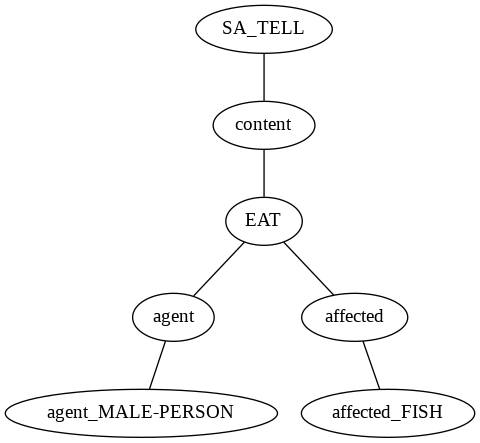

In [63]:
from IPython import display
display.Image(graph.create_png(), width=800)

## 3.2 A quick note on AMR Parser

Abstract Meaning Representation. Another semantic parser which uses PropBank roles as its semantic roles.

https://amr.isi.edu/language.html

#### Differences between TRIPS and AMR: 
Taken from lecture notes CSC447 by James Allen

 - AMR has semantic roles from PropBank, TRIPS uses its own semantic roles. 
 - AMR doesn't have word-senses for each word in the sentence, TRIPS does.
 - AMR has co-reference resolution, TRIPS doesn't.
 - The Senses in AMR are not organized in an ontology like TRIPS.

Current State-of-the-Art on AMR Parsing: https://www.aclweb.org/anthology/P19-1009

# 4. Some other NLP tasks

You can check various NLP tasks here: http://nlpprogress.com/

## 4.1 Word-Sense Disambiguation (WSD)

WSD is the task of identifying the sense of a word in a given contenxt.

#### SupWSD Python API

In [68]:
!pip install supwsd

In [0]:
from it.si3p.supwsd.api import SupWSD
from it.si3p.supwsd.config import Model, Language
import nltk

Register for the api key here:  https://supwsd.net/supwsd/register.jsp

In [0]:
sup_key = ''  ## Use your API-key here

In [0]:
#### Sentence to wordnet senses ####
def sent_to_wn_senses(sent, system="supwsd", 
                      ims_object = None, 
                      word=None,
                     supwsd_apikey=None):
    '''
    Input: sent: A string of words
    Output: list containining wordnet-senses of each word in the sent
            with respective probabilities of those senses
    '''
    if system == "supwsd":
        ans = []
        for result in SupWSD(supwsd_apikey).disambiguate(sent, Language.EN, Model.SEMCOR, True):
            token=result.token
            if not result.miss():
                sense_lst = []
                for sense in result.senses:
                    sense_lst.append((sense.id, sense.probability))

                ans.append([token.word, sense_lst])
            else:
                ans.append([token.word, [(str(result.sense()), 1.0)]])
                 
    return ans 

In [72]:
sent_to_wn_senses(r"The bat ate the fruit.", supwsd_apikey = sup_key)

[['The', [('U', 1.0)]],
 ['bat',
  [('bat%1:04:00::', 0.5006614034619067),
   ('bat%1:05:00::', 0.49933859653809326)]],
 ['ate',
  [('eat%2:34:00::', 0.39359274632325253),
   ('eat%2:34:01::', 0.33490412169593947),
   ('eat%2:34:02::', 0.27150313198080794)]],
 ['the', [('U', 1.0)]],
 ['fruit',
  [('fruit%1:20:00::', 0.44013550222089576),
   ('fruit%1:06:00::', 0.2865482137961993),
   ('fruit%1:11:00::', 0.27331628398290503)]],
 ['.', [('U', 1.0)]]]

The above word-senses are based on WordNet (https://wordnet.princeton.edu/)

## 4.2 Co-reference Resolution

#### Use Allennlp library

In [73]:
!pip install allennlp

In [74]:
from allennlp.predictors.predictor import Predictor
predictor = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/coref-model-2018.02.05.tar.gz")

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:54: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.6/dist-packages/allennlp/data/token_indexers/token_characters_indexer.py:56: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  UserWarning)


In [75]:
predictor.predict(document="The woman reading a newspaper sat on the bench with her dog.")

{'clusters': [[[0, 4], [10, 10]]],
 'document': ['The',
  'woman',
  'reading',
  'a',
  'newspaper',
  'sat',
  'on',
  'the',
  'bench',
  'with',
  'her',
  'dog',
  '.'],
 'predicted_antecedents': [-1, -1, -1, 2, -1],
 'top_spans': [[0, 4], [3, 4], [7, 11], [10, 10], [10, 11]]}

#### Visualize it here: https://demo.allennlp.org/coreference-resolution/